In [2]:
# Importing required libraries
import os
import numpy as np
import pandas as pd
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from random import randrange, uniform
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [3]:
# changing working directory
os.chdir("D:\Learning\Kaggle Projects\Kaggle_Github")

In [4]:
# verifying directory
os.getcwd()

'D:\\Learning\\Kaggle Projects\\Kaggle_Github'

In [4]:
# importing the train dataset
df_train = pd.read_csv("train.csv")

In [5]:
# getting first few observations of data
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
# checking no of rows and columns
df_train.shape

(200000, 202)

In [7]:
df_train_dtypes = df_train.dtypes
print(df_train_dtypes.nunique())
print(df_train_dtypes.unique())

3
[dtype('O') dtype('int64') dtype('float64')]


In [7]:
b = df_train.dtypes[df_train.dtypes == 'O'].index
df_train[b].head(2)

,ID_code
0,train_0
1,train_1


In [8]:
print(df_train[b].nunique())
print("Since ID_code Feature has all unique values it will not contribute to ML Model predictions we will drop it.")
print("Dataset Shape before droping feature is \n{}".format(df_train.shape))
df_train.drop('ID_code', axis = 1, inplace = True)
print("Dataset Shape after droping feature is \n{}".format(df_train.shape))

ID_code    200000
dtype: int64
Since ID_code Feature has all unique values it will not contribute to ML Model predictions we will drop it.
Dataset Shape before droping feature is 
(200000, 202)
Dataset Shape after droping feature is 
(200000, 201)


In [9]:
# checking dependent feature class distribution
df_train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [10]:
#converting datatype of target variable
df_train['target'] = df_train['target'].astype('category')

In [11]:
# importing the test dataset
df_test = pd.read_csv("test.csv")

In [12]:
# getting overview of data
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [13]:
# checking no of rows and columns
df_test.shape

(200000, 201)

In [14]:
print(df_test.dtypes.nunique())
print(df_test.dtypes.unique())

2
[dtype('O') dtype('float64')]


In [13]:
c = df_test.dtypes[df_test.dtypes == 'O'].index
print(df_test[c].nunique())
print("Since ID_code Feature has all unique values it will not contribute to ML Model predictions we will drop it.")
print("Dataset Shape before droping feature is \n{}".format(df_test.shape))
df_test.drop('ID_code', axis = 1, inplace = True)
print("Dataset Shape after droping feature is \n{}".format(df_test.shape))

ID_code    200000
dtype: int64
Since ID_code Feature has all unique values it will not contribute to ML Model predictions we will drop it.
Dataset Shape before droping feature is 
(200000, 201)
Dataset Shape after droping feature is 
(200000, 200)


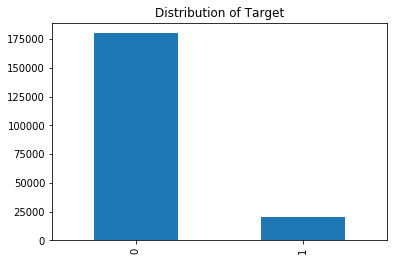

In [14]:
#checking data distribution in the target variable
df_train['target'].value_counts().plot(kind = 'bar', title = 'Distribution of Target')
#It is visible from below graph that data is not equalyy distributed

In [15]:
#checking for missing values in Train Set
missing_val = pd.DataFrame(df_train.isnull().sum())

#reshaping missing val dataframe
missing_val = missing_val.rename(columns = {'index' : 'Variable Names', 0 : 'Missing_Percent'})

#Calculating percentage
missing_val['Missing_Percent'] = (missing_val['Missing_Percent']) / len(df_train) * 100

#there is no missing values in our train data

#checking for missing values in Test Set
missing_val_test = pd.DataFrame(df_test.isnull().sum())

#reshaping missing val dataframe
missing_val_test = missing_val_test.rename(columns = {'index' : 'Variable Names', 0 : 'Missing_Percent'})

#Calculating percentage
missing_val_test['Missing_Percent'] = (missing_val_test['Missing_Percent']) / len(df_test) * 100

#there is no missing values in our test data

In [16]:
print("As we can see there are no Duplicates in the training dataset we are good to proceed.")
print("No of Duplicate rows : {}".format(df_train.duplicated().sum()))
print("-"*100)
print("As we can see there are no Duplicates in the test dataset we are good to proceed.")
print("No of Duplicate rows : {}".format(df_test.duplicated().sum()))

As we can see there are no Duplicates in the training dataset we are good to proceed.
No of Duplicate rows : 0
----------------------------------------------------------------------------------------------------
As we can see there are no Duplicates in the test dataset we are good to proceed.
No of Duplicate rows : 0


In [18]:
print("Training Set")
print("As we can see there are no Missing values in the training dataset we are good to proceed.")
print(missing_val.iloc[np.where(missing_val['Missing_Percent'] > 0)])
print("-"*100)
print("Test Set")
print("As we can see there are no Missing values in the training dataset we are good to proceed.")
print(missing_val_test.iloc[np.where(missing_val_test['Missing_Percent'] > 0)])

Training Set
As we can see there are no Missing values in the training dataset we are good to proceed.
Empty DataFrame
Columns: [Missing_Percent]
Index: []
----------------------------------------------------------------------------------------------------
Test Set
As we can see there are no Missing values in the training dataset we are good to proceed.
Empty DataFrame
Columns: [Missing_Percent]
Index: []


# Checking Co-relation amongst features

Training Set


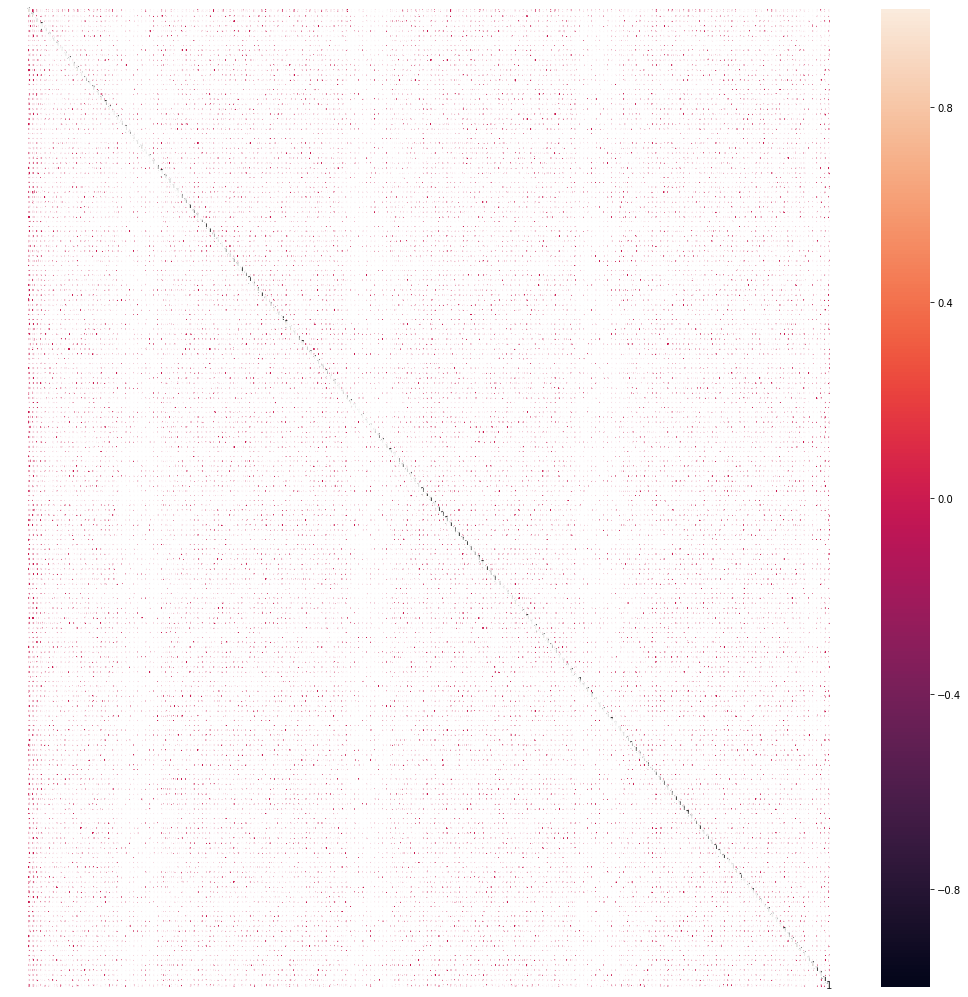

In [23]:
print("Training Set")
corr_train = df_train.corr(method = 'pearson')
# Generate a custom diverging colormap
Cmap=sns.diverging_palette(220,10,as_cmap=True)
fig, ax = plt.subplots(figsize = (18,18))
sns.heatmap(corr_train, xticklabels= False, yticklabels= False, cbar=True, annot = True, ax = ax, vmin = -1, linewidths = 0.2)

Test Set


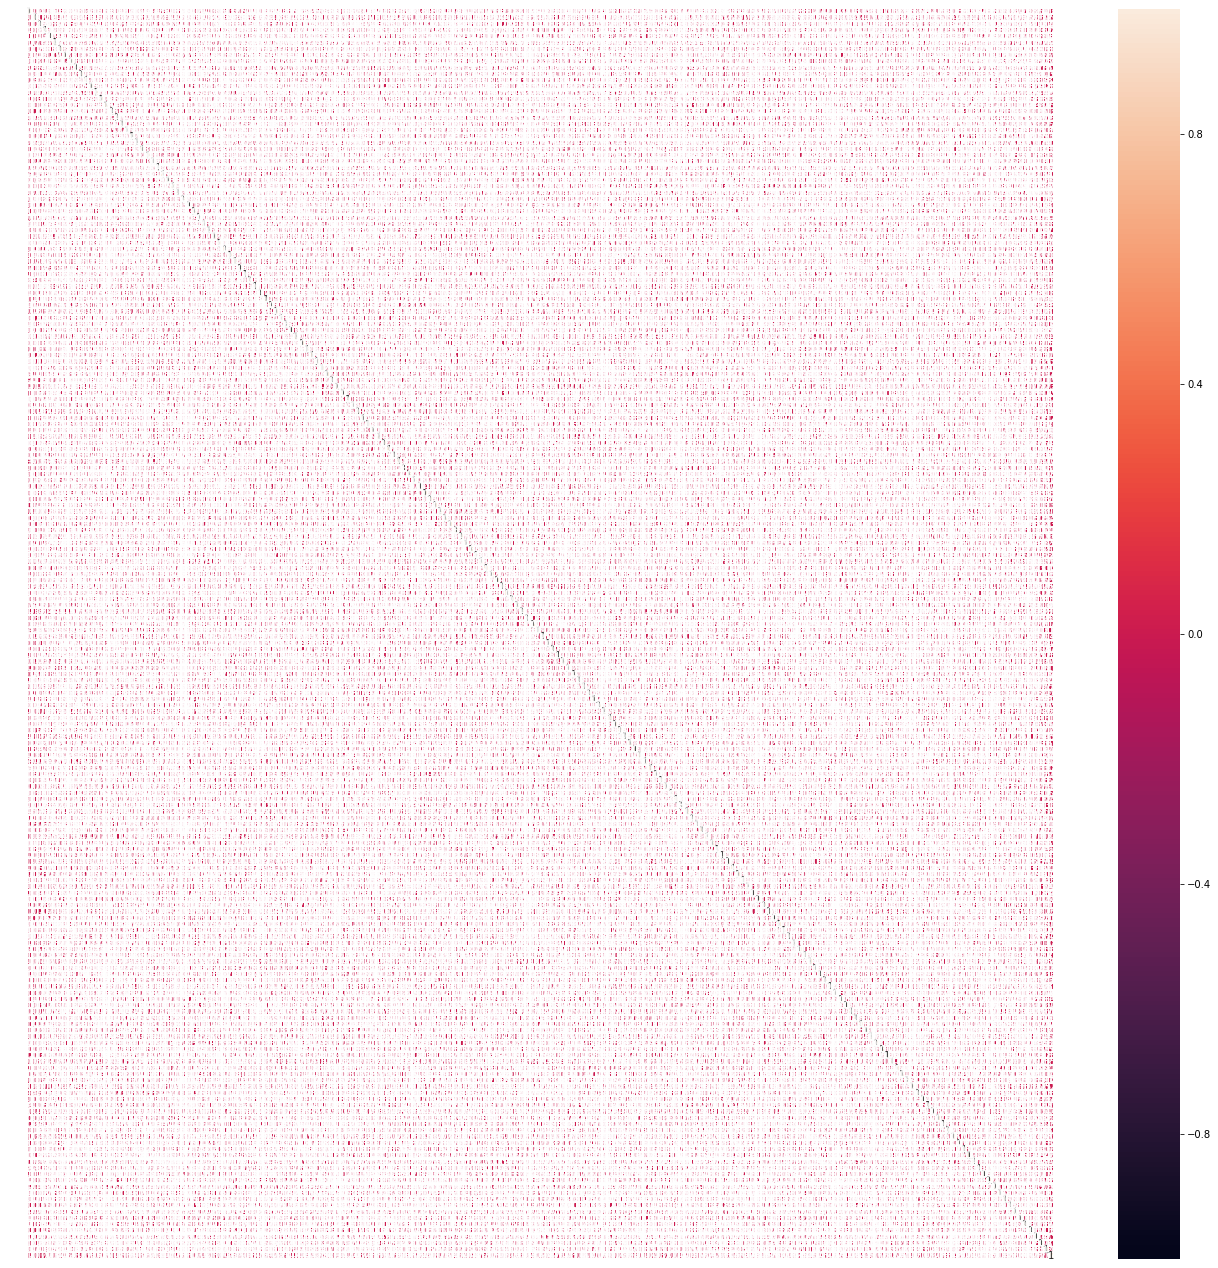

In [22]:
print("Test Set")
corr = df_test.corr(method = 'pearson')
fig, ax = plt.subplots(figsize = (23,23))
# Generate a custom diverging colormap
Cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, xticklabels= False, yticklabels= False, cbar=True, annot = True, ax = ax, vmin=-1, linewidths=0.2)

# Feature Scaling

In [102]:
scaler = MinMaxScaler()
df_train_scaled_s = scaler.fit_transform(df_train)
df_train_scaled = pd.DataFrame(df_train_scaled_s, columns = df_train.columns)

df_test_scaled_s = scaler.fit_transform(df_test)
df_test_scaled = pd.DataFrame(df_test_scaled_s, columns = df_test.columns)

In [26]:
df_train_scaled['target'].value_counts()

0.0    179902
1.0     20098
Name: target, dtype: int64

In [27]:
df_train_scaled['target'] = df_train_scaled['target'].astype(int)

In [28]:
df_train_scaled['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

# Feature Selection 

In [29]:
#Dividing Independent and Dependent features
Dependent_train = pd.DataFrame(df_train_scaled.iloc[:,0])
Independent_train = df_train_scaled.iloc[:,1:202]

In [30]:
best_feature = SelectKBest(score_func = chi2, k = 'all')
fit = best_feature.fit(Independent_train, Dependent_train)

scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(Independent_train.columns)

feature_scores = pd.concat([columns, scores], axis = 1)
feature_scores.columns = ['features', 'scores']

feature_scores.sort_values('scores', axis = 0, ascending = False, inplace = True)

In [31]:
print("Number of Selected Features : {}".format(len(feature_scores.iloc[np.where(feature_scores['scores'] > 10)])))

Number of Selected Features : 68


In [32]:
Selected_Features = pd.DataFrame(feature_scores.iloc[np.where(feature_scores['scores'] > 10)])

In [33]:
Selected_Features[['features_1','features_2']] = Selected_Features.features.str.split('_', expand = True)
Selected_Features['features_2'] = Selected_Features['features_2'].astype(int)
Selected_Features.sort_values('features_2', axis = 0, ascending = True, inplace = True)

In [34]:
Selected_Features

,features,scores,features_1,features_2
0,var_0,24.811213,var,0
1,var_1,24.379472,var,1
2,var_2,29.380321,var,2
6,var_6,35.810639,var,6
9,var_9,21.645666,var,9
...,...,...,...,...
190,var_190,23.111287,var,190
191,var_191,20.638440,var,191
192,var_192,11.445829,var,192
197,var_197,11.892377,var,197


In [35]:
Selected_Features['features'].unique()

array(['var_0', 'var_1', 'var_2', 'var_6', 'var_9', 'var_12', 'var_13',
       'var_18', 'var_21', 'var_22', 'var_26', 'var_33', 'var_34',
       'var_36', 'var_40', 'var_44', 'var_53', 'var_67', 'var_71',
       'var_75', 'var_76', 'var_78', 'var_80', 'var_81', 'var_86',
       'var_89', 'var_91', 'var_92', 'var_94', 'var_95', 'var_99',
       'var_107', 'var_108', 'var_109', 'var_110', 'var_115', 'var_118',
       'var_119', 'var_121', 'var_122', 'var_123', 'var_127', 'var_133',
       'var_139', 'var_146', 'var_147', 'var_148', 'var_149', 'var_154',
       'var_155', 'var_157', 'var_164', 'var_165', 'var_166', 'var_169',
       'var_170', 'var_172', 'var_173', 'var_174', 'var_177', 'var_179',
       'var_184', 'var_188', 'var_190', 'var_191', 'var_192', 'var_197',
       'var_198'], dtype=object)

In [36]:
Independent_train_selected = Independent_train[Selected_Features['features']]

In [37]:
print("Train Dataset")
a = Independent_train_selected.shape
print("No of Observations : {}".format(a[0]))
print("No of Features : {}".format(a[1]))

No of Observations : 200000
No of Features : 68


In [38]:
Independent_test_selected = df_test_scaled[Selected_Features['features']]

In [39]:
print("Test Dataset")
b = Independent_test_selected.shape
print("No of Observations : {}".format(a[0]))
print("No of Features : {}".format(a[1]))

Test Dataset
No of Observations : 200000
No of Features : 68


# Handling Imbalanced Dataset

In [40]:
Final_Data_Train = df_train_scaled[Independent_train_selected.columns]
Final_Data_Train['Target'] = Dependent_train.iloc[:,0]
Final_Data_Train.shape

C:\Users\Sanket.mote\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(200000, 69)

In [41]:
smote = SMOTE()
y = Final_Data_Train.iloc[:,68]

In [43]:
x_training, y_training, x_testing, y_testing = train_test_split(Final_Data_Train.iloc[:,0:68], Final_Data_Train.iloc[:,68], stratify = y, test_size = 0.2, random_state = 10)

In [44]:
print("************************************* After Splitting Train & Test data *************************************")
print("\n")
print("Count of training independent variables \n{}".format(x_training.shape))
print("\n")
print("Count of testing independent variables \n{}".format(y_training.shape))
print("\n")
x_testing = pd.DataFrame(x_testing)
y_testing = pd.DataFrame(y_testing)
print("Distribution of training dependent variables is \n{}".format(x_testing['Target'].value_counts()))
print("\n")
print("Distribution of testing dependent variables is \n{}".format(y_testing['Target'].value_counts()))

************************************* After Splitting Train & Test data *************************************


Count of training independent variables 
(160000, 68)


Count of testing independent variables 
(40000, 68)


Distribution of training dependent variables is 
0    143922
1     16078
Name: Target, dtype: int64


Distribution of testing dependent variables is 
0    35980
1     4020
Name: Target, dtype: int64


In [45]:
x_training_smote, x_testing_smote = smote.fit_sample(x_training, x_testing)

In [46]:
print("Before SMOTE")
print(x_training.shape)
print("After SMOTE")
print(x_training_smote.shape)
print("\n")
print("Before SMOTE")
print(x_testing['Target'].value_counts())
print("After SMOTE")
print(x_testing_smote['Target'].value_counts())

Before SMOTE
(160000, 68)
After SMOTE
(287844, 68)


Before SMOTE
0    143922
1     16078
Name: Target, dtype: int64
After SMOTE
1    143922
0    143922
Name: Target, dtype: int64


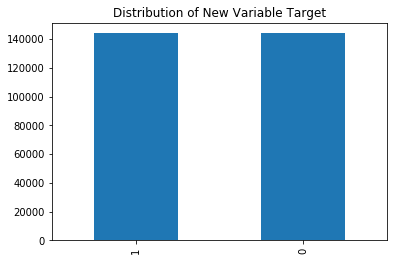

In [47]:
# Now ensuring our data is equally distributed
x_testing_smote['Target'].value_counts().plot(kind = 'bar', title = 'Distribution of New Variable Target')

# Logistic Regression

In [49]:
logit1 = LogisticRegression().fit(x_training_smote, x_testing_smote['Target'])

In [50]:
logit_predictions = logit1.predict(y_training)

In [51]:
logit_predictions = pd.DataFrame(logit_predictions)
logit_predictions = logit_predictions.rename(columns = {0 : 'Predictions'})

,Predictions
0,0
1,0


In [52]:
logit_predictions['Predictions'].value_counts()

0    28140
1    11860
Name: Predictions, dtype: int64

In [53]:
#Build Confusion Matrix
CM_LR = pd.crosstab(y_testing['Target'], logit_predictions['Predictions'])

In [54]:
CM_LR

Predictions,0,1
Target,,
0,4984,2111
1,541,242


In [55]:
TP = CM_LR.iloc[1,1]
FP = CM_LR.iloc[0,1]
FN = CM_LR.iloc[1,0]
TN = CM_LR.iloc[0,0]

In [56]:
# Check accuracy of the model
((TP+TN)*100) / (TP+FP+FN+TN)

66.33663366336634

In [92]:
logModel = LogisticRegression()

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

random = RandomizedSearchCV(logModel,
                            param_distributions=param_grid,
                            scoring='roc_auc',
                            cv = 3,
                            verbose=1,
                            n_jobs=-1)

random_result = random.fit(x_training_smote, x_testing_smote['Target'])

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished
C:\Users\Sanket.mote\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Best Score:  0.8392627890247804
Best Params:  {'solver': 'sag', 'penalty': 'none', 'max_iter': 5000, 'C': 0.23357214690901212}


In [57]:
logit_model = LogisticRegression(solver = 'sag', penalty = 'none', max_iter = 5000, C = 0.23357214690901212).fit(x_training_smote, x_testing_smote['Target'])

C:\Users\Sanket.mote\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


In [58]:
LR_predictions = logit_model.predict(y_training)
CM_LR = pd.crosstab(y_testing['Target'], LR_predictions)
acc_LR = accuracy_score(y_testing['Target'], LR_predictions)
print("Confusion Matrix is as follows: \n{}".format(CM_LR))
print("Accuracy of Random Forest Model is : {}".format(acc_LR))

Confusion Matrix is as follows: 
col_0       0     1
Target             
0       27150  8830
1         991  3029
Accuracy of Random Forest Model is : 0.754475


In [59]:
#Classification report:-
classification_scores_LR=classification_report(y_testing['Target'], LR_predictions)
print(classification_scores_LR)

              precision    recall  f1-score   support

           0       0.96      0.75      0.85     35980
           1       0.26      0.75      0.38      4020

    accuracy                           0.75     40000
   macro avg       0.61      0.75      0.61     40000
weighted avg       0.89      0.75      0.80     40000



ROC Score Logistic Regression: 0.7540342340548508




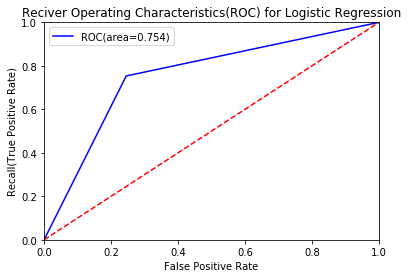

AUC: 0.7540342340548508


In [60]:
#ROC_AUC SCORE
roc_score=roc_auc_score(y_testing['Target'], LR_predictions)
print('ROC Score Logistic Regression:',roc_score)
print("\n")
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_testing['Target'], LR_predictions)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC) for Logistic Regression')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

### Predicting on Provided Test Case

In [103]:
LR_predictions = logit_model.predict(Independent_test_selected)

# Extreme Gradient Boosting

In [62]:
classifier = XGBClassifier()
XGB_model = classifier.fit(x_training_smote, x_testing_smote['Target'])

In [63]:
XGB_predictions = XGB_model.predict(y_training)

In [64]:
#Build Confusion Matrix
CM_XGB = pd.crosstab(y_testing['Target'], XGB_predictions)

In [65]:
CM_XGB

col_0,0,1
Target,,
0,29810,6170
1,2173,1847


In [66]:
TP = CM_XGB.iloc[1,1]
FP = CM_XGB.iloc[0,1]
FN = CM_XGB.iloc[1,0]
TN = CM_XGB.iloc[0,0]

In [67]:
# Check accuracy of the model
((TP+TN)*100) / (TP+FP+FN+TN)

79.1425

### Results After Hyper Parameter Optimization

In [53]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}

In [54]:
def timer(start_time = None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600) 
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [57]:
classifier = XGBClassifier()
r_search = RandomizedSearchCV(classifier, param_distributions = params, n_iter = 5, scoring = 'roc_auc', n_jobs = -1, cv = 5, verbose = 3)

In [67]:
from datetime import datetime
start_time = timer(None) # timing starts from this point for "start_time" variable
r_search.fit(sample_smote_train_ind, sample_smote_train_dep['Target'])
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.0min finished



 Time taken: 0 hours 4 minutes and 22.22 seconds.


In [69]:
r_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
r_search.best_params_

{'min_child_weight': 3,
 'max_depth': 12,
 'learning_rate': 0.3,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [72]:
print(x_training_smote.shape)
print(x_testing_smote['Target'].shape)
print(x_testing_smote['Target'].value_counts())

(287844, 68)
(287844,)
1    143922
0    143922
Name: Target, dtype: int64


In [68]:
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=12,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
XGB_model = classifier.fit(x_training_smote, x_testing_smote['Target'])

In [72]:
XGB_predictions = XGB_model.predict(y_training)

In [73]:
CM_XGB = pd.crosstab(y_testing['Target'], XGB_predictions)
acc_XGB = accuracy_score(y_testing['Target'], XGB_predictions)
print("Confusion Matrix is as follows: \n{}".format(CM_XGB))
print("Accuracy of Random Forest Model is : {}".format(acc_XGB))

Confusion Matrix is as follows: 
col_0       0     1
Target             
0       32574  3406
1        2819  1201
Accuracy of Random Forest Model is : 0.844375


In [74]:
#Classification report:-
classification_scores_xgb=classification_report(y_testing['Target'], XGB_predictions)
print(classification_scores_xgb)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     35980
           1       0.26      0.30      0.28      4020

    accuracy                           0.84     40000
   macro avg       0.59      0.60      0.60     40000
weighted avg       0.85      0.84      0.85     40000



ROC Score Extreme Gradient Boosting: 0.6020462584243873




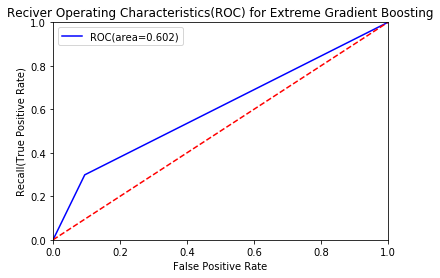

AUC: 0.6020462584243873


In [75]:
#ROC_AUC SCORE
roc_score=roc_auc_score(y_testing['Target'], XGB_predictions)
print('ROC Score Extreme Gradient Boosting:',roc_score)
print("\n")
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_testing['Target'], XGB_predictions)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC) for Extreme Gradient Boosting')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

### Predicting on Provided Test Case

In [104]:
XGB_predictions = XGB_model.predict(Independent_test_selected)

# Random Forest Model

In [77]:
# Building Random Forest Model
RF_model = RandomForestClassifier(n_estimators = 300).fit(x_training_smote, x_testing_smote['Target'])

In [78]:
RF_predictions_samp_3 = RF_model.predict(y_training)

In [79]:
#Build Confusion Matrix
CM_RF = pd.crosstab(y_testing['Target'], RF_predictions_samp_3)

In [80]:
CM_RF

col_0,0,1
Target,,
0,34791,1189
1,3589,431


In [81]:
acc_rf = accuracy_score(y_testing['Target'], RF_predictions_samp_3)
print(acc_rf)

0.88055


### Results After Hyper Parameter Optimization

In [76]:
y1 = sample_new['Target']

NameError: name 'sample_new' is not defined

In [62]:
rest_new, sample_new = train_test_split(Final_Data_Train, stratify = y, test_size = 0.1, random_state = 10)
print(rest_new.shape)
print(sample_new.shape)
sample_smote_train, sample_smote_test = train_test_split(sample_new, stratify = y1, test_size = 0.2, random_state = 10)

(180000, 69)
(20000, 69)


In [63]:
print(sample_smote_train.shape)
print(sample_smote_test.shape)
print(sample_smote_train['Target'].value_counts())
print(sample_smote_test['Target'].value_counts())

(16000, 69)
(4000, 69)
0    14392
1     1608
Name: Target, dtype: int64
0    3598
1     402
Name: Target, dtype: int64


In [64]:
sample_smote_train_ind, sample_smote_train_dep = smote.fit_sample(sample_smote_train.iloc[:,0:68], sample_smote_train.iloc[:,68])

In [65]:
sample_smote_train_dep = pd.DataFrame(sample_smote_train_dep)

In [66]:
print(sample_smote_train_ind.shape)
print(sample_smote_train_dep.shape)
print(sample_smote_train_dep['Target'].value_counts())

(28784, 68)
(28784, 1)
1    14392
0    14392
Name: Target, dtype: int64


In [48]:
test = RandomForestClassifier(n_jobs = -1)
rf_p_dist = {'max_depth':[3,5,7,10, None],
             'n_estimators': [10,100,200,300,400,500,600,700],
             'max_features': randint(1,14),
             'criterion': ['gini','entropy'],
             'bootstrap': [True, False],
             'min_samples_leaf': randint(1,5)
            }

In [49]:
def hypertuning_rf(test, p_dist, nbr_iter, X, Y):
    rdmsearch = RandomizedSearchCV(test, param_distributions=p_dist, n_iter = nbr_iter, cv=9)
    rdmsearch.fit(X,Y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [304]:
rf_parameters, rf_ht_score = hypertuning_rf(test, rf_p_dist, 20, sample_smote_train_ind, sample_smote_train_dep['Target'])

In [305]:
rf_parameters

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 3,
 'n_estimators': 700}

In [310]:
rf_ht_score

0.9786003630268988

In [92]:
RF_model = RandomForestClassifier(bootstrap = False, criterion = 'entropy', max_depth = None, max_features = 4, min_samples_leaf = 5, n_estimators = 700).fit(x_training_smote, x_testing_smote['Target'])

In [93]:
RF_predictions = RF_model.predict(y_training)

In [94]:
CM_RF = pd.crosstab(y_testing['Target'], RF_predictions)
acc_rf = accuracy_score(y_testing['Target'], RF_predictions)
print("Confusion Matrix is as follows: \n{}".format(CM_RF))
print("Accuracy of Random Forest Model is : {}".format(acc_rf))

Confusion Matrix is as follows: 
col_0       0     1
Target             
0       34920  1060
1        3523   497
Accuracy of Random Forest Model is : 0.885425


In [95]:
#Classification report:-
classification_scores_rf=classification_report(y_testing['Target'], RF_predictions)
print(classification_scores_rf)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     35980
           1       0.32      0.12      0.18      4020

    accuracy                           0.89     40000
   macro avg       0.61      0.55      0.56     40000
weighted avg       0.85      0.89      0.86     40000



ROC Score Random Forest: 0.5470855146170205




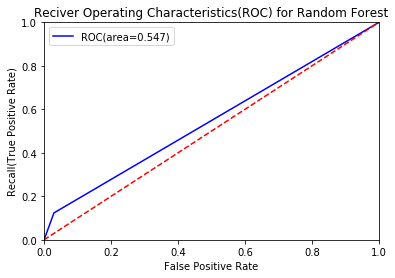

AUC: 0.5470855146170205


In [96]:
#ROC_AUC SCORE
roc_score=roc_auc_score(y_testing['Target'], RF_predictions)
print('ROC Score Random Forest:',roc_score)
print("\n")
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_testing['Target'], RF_predictions)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC) for Random Forest')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

### Predicting on Provided Test Case

In [105]:
RF_predictions = RF_model.predict(Independent_test_selected)

# Naive Bayes Algorithm

In [83]:
#Running Naive Bayes Algorithm
NB_model = GaussianNB().fit(x_training_smote, x_testing_smote['Target'])

In [84]:
#Predicting test data
NB_predictions = NB_model.predict(y_training)

In [85]:
#Build Confusion Matrix
CM_NB = pd.crosstab(y_testing['Target'], NB_predictions)

In [86]:
CM_NB

col_0,0,1
Target,,
0,29094,6886
1,2109,1911


In [87]:
TN_NB = CM_NB.iloc[0,0]
TP_NB = CM_NB.iloc[1,1]
FP_NB = CM_NB.iloc[0,1]
FN_NB = CM_NB.iloc[1,0]

In [88]:
# Check accuracy of the model
((TP_NB+TN_NB)*100) / (TP_NB+FP_NB+FN_NB+TN_NB)

77.5125

In [89]:
CM_NB = pd.crosstab(y_testing['Target'], NB_predictions)
acc_nb = accuracy_score(y_testing['Target'], NB_predictions)
print("Confusion Matrix is as follows: \n{}".format(CM_NB))
print("Accuracy of Random Forest Model is : {}".format(acc_nb))

Confusion Matrix is as follows: 
col_0       0     1
Target             
0       29094  6886
1        2109  1911
Accuracy of Random Forest Model is : 0.775125


In [90]:
#Classification report:-
classification_scores_nb=classification_report(y_testing['Target'], NB_predictions)
print(classification_scores_nb)

              precision    recall  f1-score   support

           0       0.93      0.81      0.87     35980
           1       0.22      0.48      0.30      4020

    accuracy                           0.78     40000
   macro avg       0.57      0.64      0.58     40000
weighted avg       0.86      0.78      0.81     40000



ROC Score Naive Bayes: 0.6419945160246572




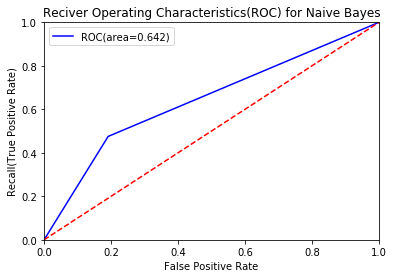

AUC: 0.6419945160246572


In [91]:
#ROC_AUC SCORE
roc_score_nb=roc_auc_score(y_testing['Target'], NB_predictions)
print('ROC Score Naive Bayes:',roc_score_nb)
print("\n")
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_testing['Target'], NB_predictions)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC) for Naive Bayes')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

### Predicting on Provided Test Case

In [106]:
NB_predictions = NB_model.predict(Independent_test_selected)